# 2.3 적응형 선형 뉴런과 학습의 수렴

- 적응형 선형 뉴런(ADAptive LInear NEuron, ADALINE)
    - 단일층 신경망의 또 다른 종류이며 아달린이라고 함
    - 퍼셉트론의 향상된 버전으로 볼 수 있음
    
    
- 퍼셉트론과 아달린의 비교
    - 아달린은 가중치 업데이트에 **선형 활성화 함수**를 사용함
    - 따라서, 선형 활성화 함수$\phi(z)$ 는 최종 입력과 동일함 (아래 식 참고)
    - $\phi(z) = \phi(w^Tx) = w^Tx = z$ $(\therefore \phi(z) = z)$
    - 하지만 최종 예측에는 여전히 임계함수를 사용함
    

- 요약
    - 아달린 알고리즘은 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트
    - 퍼셉트론 알고리즘은 진짜 클래스 레이블과 예측 클래스 레이블을 비교해 모델의 오차를 계산하고 가중치를 업데이트

### 2.3.1 경사 하강법으로 비용함수 최소화

- 아달린 알고리즘의 비용 함수(또는 목적함수, 손실함수라고도 함)
    - 제곱 오차 합(Sum of Squared Errors, SSE)
    - $ J(w) = \frac{1}{2} \sum_{i} (y^{(i)}-\phi(z^{(i)}))^2$ (∵$\frac{1}{2}$항은 gradient를 간소화 하기 위해 편의상 추가한 것)
    
    
- 연속적인 선형 활성화 함수의 장점
    - 비용 함수가 **미분이 가능**하며 볼록 함수
    - 위의 두 장점을 통해 **경사 하강법(gradient descent)**를 적용할 수 있음
    
    
- 경사 하강법(gradient descent)
    - 각 반복에서 경사의 반대방향으로 진행
    - 진행 크기는 경사의 기울기와 학습률로 결정
    - 경사 하강법을 사용하면 비용함수 $J(w)$의 그래디언트 $\nabla J(w)$ 반대 방향으로 조금씩 가중치를 업데이트
    
    
- 아달린의 학습 규칙
    - $w^{(i)} = w^{(i-1)} + \Delta w^{(i)}$,  $\Delta w^{(i)} = -\eta \nabla J(w)$
    - $\therefore w^{(i)} = w^{(i-1)} -\eta \nabla J(w)$

    
- 각 가중치 $w_j$의 업데이트 공식
    - $\frac{\partial J(w)}{\partial w_j} = \frac{\partial}{\partial w_j} \Bigl( \frac{1}{2} \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr)^2 \Bigr)$
        - $\require{cancel} = \cancel{\frac{1}{2}} \cancel{2} \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr) \frac{\partial}{\partial w_j} \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr)$
        - $= \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr) \frac{\partial}{\partial w_j} \sum_{i} \bigl(y^{(i)}-w^{(i)}x^{(i)}\bigr)$
        - $= \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr) \frac{\partial}{\partial w_j} \sum_{i} \bigl(-w^{(i)}_j x^{(i)}_j\bigr)$
        - $= \sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr) \bigl(-x^{(i)}_j\bigr)$
        - $= -\sum_{i} \bigl(y^{(i)}-\phi(z^{(i)})\bigr) \bigl(x^{(i)}_j\bigr)$
    - $\therefore \Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum_i \bigl(y^{(i)} - \phi(z^{(i)}) \bigr) x_j^{(i)}$
    
    
- 아달린 학습 규칙은 실수를 대상으로 함
- 아달린의 학습은 모든 훈련 세트의 샘플을 기반으로 가중치를 업데이트 하는데, 이 방식을 **배치 경사 하강법(batch gradient descent)**라고 함

### 2.3.2 파이썬으로 아달린 구현

In [1]:
# 붓꽃 데이터셋 로드

import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
import numpy as np

# 4번째 열이 class
# Iris-setosa면 1, Iris-versicolor -1
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', 1, -1)

# 2번째, 4번째 열이 각각 꽃받침 길이, 꽃잎 길이
X = df.iloc[0:100, [0, 2]].values

print(X.shape, y.shape)
a = np.array([1, 2])
print(a.shape)
print(np.dot(a, X.T).shape)
print(np.dot(y, X).shape)

(100, 2) (100,)
(2,)
(100,)
(2,)


In [3]:
# 아달린 구현

class Adaline:
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = 1
        
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1]+1)
        
        self.cost_ = []
        
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[0] += self.eta * errors.sum()
            self.w_[1:] += self.eta * np.dot(errors, X)
            cost = ((errors**2)/2.0).sum()
            self.cost_.append(cost)
            
        return self
        
        
    def activation(self, net_input):
        return net_input
    
    
    def net_input(self, X):
        return np.dot(self.w_[1:], X.T) + self.w_[0]
    
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

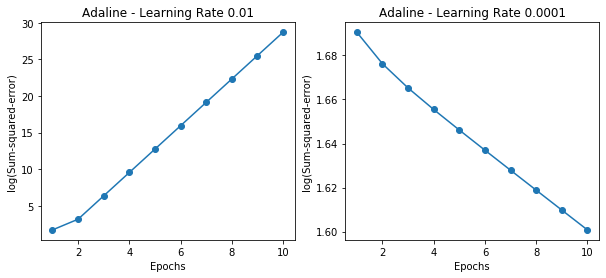

In [4]:
# 최적의 eta값을 찾기 위해 0.01, 0.0001에 대해 테스트하고 그래프 출력 후 비교

import matplotlib.pyplot as plt

# 1행 2열 plot 생성
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# eta 0.01인 Adaline에 학습 및 1행 1열 plot에 출력
ada1 = Adaline(epochs=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

# eta 0.0001인 Adaline에 학습 및 1행 2열 plot에 출력
ada2 = Adaline(epochs=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show()

**결과 분석**
- eta 0.01
    - 비용 함수를 최소화하지 못하고 오차가 점점 더 커짐
    - global minimum으로 가지 못하고 지나쳐버림
    
- eta 0.0001
    - 비용이 감소하고는 있지만 $\eta$(학습률)이 너무 작아서 global minimum에 수렴하려면 아주 많은 epoch이 필요
    

- **적절한 학습률을 사용해야 함**

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상
- 표준화(standardization)
    - Feature의 scale을 조절하는 방법 중 하나
    - Data에 표준정규분포(평균0, 표준편차1)의 성질을 부여해 경사 하강법 학습이 빠르게 수렴되로록 함
    
    
- 표준화 방법
    - 각 feature별로 평균을 빼주고 표준편차로 나눔
    - 식으로 나타내면 다음과 같음
    - $x^{\prime}_j = \frac{x_j - \mu_j}{\sigma_j}$
        - $x_j$ : $j$번째 feature 샘플
        - $\mu_j$ : $j$번째 feature 샘플 벡터의 평균
        - $\sigma_j$ : $j$번째 feature 샘플 벡터의 표준 편차

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # matplotlib에서 정의한 점 표시 모양
    markers = ('s', 'x', 'o', '^', 'v')
    # 각 점을 표시할 색깔
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # y에 있는 class의 수 만큼의 color map을 만듦
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 각 feature의 최소값-1에서, 최대값+1까지 resolution간격인 배열을 만들고
    # 그 배열들을 각각 X, Y축으로 하는 좌표 평면 배열을 만듦
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # feature의 범위로 이루어진 좌표 평면 배열을 
    # 우리가 만든 퍼셉트론의 predict()에 인자로 전달해
    # predict값으로 이루어진 좌표 평면 배열을 만듦
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # 위에서 만든 predict값 좌표 평면 그리드를
    # contourf()를 통해 등고선 그래프로 그린다.
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

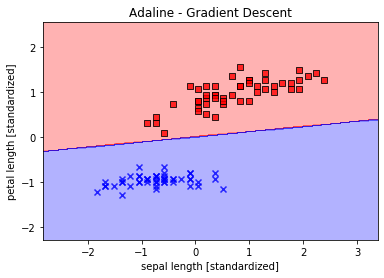

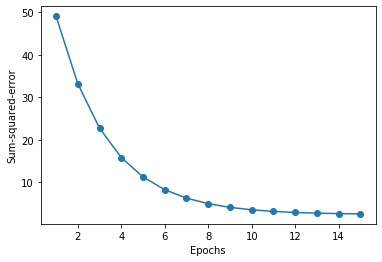

In [6]:
# standardization 적용
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / (X[:, 0].std())
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / (X[:, 1].std())

ada_std = Adaline(epochs=15, eta=0.01)
ada_std.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_std)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada_std.cost_)+1), ada_std.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

**결과 분석**
- 표준화된 데이터를 사용해서 $\eta=0.01$에서도 수렴하였음**
- **데이터의 스케일링이 중요**

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법(stochastic gradient descent)
- gradient descent의 3가지 방식
    - **batch gradient descent(배치 경사 하강법)** : **전체** 훈련 데이터에서 cost를 계산해 가중치를 업데이트
    - **mini-batch gradient descent(미니 배치 경사 하강법)** : **일부** 훈련 데이터에서 cost를 계산해 가중치를 업데이트
    - **stochastic gradient descent(확률적 경사 하강법)** : **하나**의 훈련 데이터에서 cost를 계산해 가중치를 업데이트

    
- stochastic gradient descent
    - 가중치 계산
        - 하나씩 계산하므로, batch gradient descent의 전체에 대한 부분인 $\sum$을 지운 형태
        - $\require{cancel} \therefore \Delta w = \eta \cancel{\sum_i} \Bigl(y^{(i)} - \phi(z^{(i)})\bigl) x^{(i)} = \eta \Bigl(y^{(i)} - \phi(z^{(i)})\bigl) x^{(i)}$
        
    - 특징
        - 가중치 업데이트가 더 자주 일어나므로 수렴 속도가 빠름
        - gradient가 하나씩 계산되므로 오차의 궤적이 어지러움
        - 비선형 비용 함수를 다룰 때, 얕은 local minimum을 더 쉽게 탈출할 수 있어 장점이 되기도 함
        - 온라인 학습(online learning)에 사용 가능(스트리밍 데이터에 대해 적용 가능)
        
    - 좋은 결과를 얻기 위한 조건
        - 각 epoch마다 훈련 데이터를 무작위하게 주입해야 함


In [7]:
# stochastic gradient descent의 구현

class AdalineSGD:
    def __init__(self, eta=0.01, epochs=50, shuffle=True, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False
        
        
    def fit(self, X, y):
        self._weight_initialize(X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.epochs):
            X, y = self._shuffle(X, y)
            cost = []
            
            for xi, target in zip(X, y):
                cost.append(self._update_weight(xi, target))
            
            avg_cost = np.sum(cost) / len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    
    def partial_fit(self, X, y):
        if not w_initialized:
            self._weight_initialize(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            X, y = self._shuffle(X, y)

            for xi, target in zip(X, y):
                self._update_weight(xi, target)

        else:
            self._update_weight(X, y)

        return self
            
            
    def _weight_initialize(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m+1)
        w_initialized = True
        
    
    def _shuffle(self, X, y):
        r_idx_arr = self.rgen.permutation(len(y))
        return X[r_idx_arr], y[r_idx_arr]
    
    
    def _update_weight(self, xi, target):
        error = (target - self.activation(self.net_input(xi)))
        self.w_[0] += self.eta * error
        self.w_[1:] += self.eta * np.dot(error, xi.T)
        cost = 0.5 * (error**2)
        return cost
        
        
    def activation(self, net_input):
        return net_input
    
    
    def net_input(self, xi):
        return np.dot(self.w_[1:], xi.T) + self.w_[0]
    
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

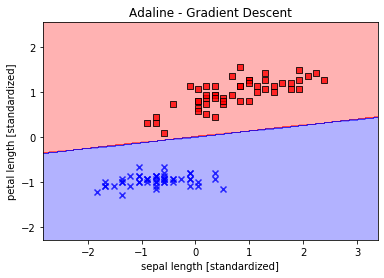

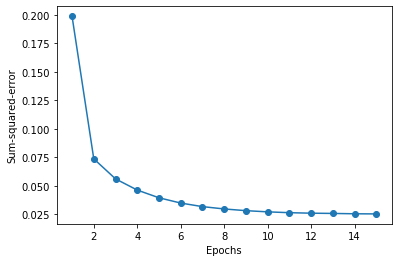

In [8]:
ada_sgd = AdalineSGD(epochs=15, eta=0.01)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada_sgd.cost_)+1), ada_sgd.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

**결과 분석**
- batch gradient descent보다 평균 비용이 빠르게 감소